In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(url)

In [3]:
df = pd.read_csv(url, sep=';')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df = pd.DataFrame(df)

# Counting columns by type
columnas_objeto = df.select_dtypes(include='object').columns
columnas_int64 = df.select_dtypes(include='int64').columns
columnas_float64 = df.select_dtypes(include='float64').columns

# Show results as a list
print(f'Columnas de tipo objeto ({len(columnas_objeto)}): {columnas_objeto.tolist()}')
print(f'Columnas de tipo int64 ({len(columnas_int64)}): {columnas_int64.tolist()}')
print(f'Columnas de tipo float64 ({len(columnas_float64)}): {columnas_float64.tolist()}')

Columnas de tipo objeto (11): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Columnas de tipo int64 (5): ['age', 'duration', 'campaign', 'pdays', 'previous']
Columnas de tipo float64 (5): ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [6]:
df.shape

(41188, 21)

In [7]:
# Nulls columns
print(df.isnull().sum())


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [8]:
# Check for null values ​​in the DataFrame
valores_nulos = df.isnull().sum()

# Show the number of null values
if valores_nulos.sum() == 0:
    print("No hay valores nulos en el conjunto de datos.")
else:
    print("Hay valores nulos. Aquí está la cuenta por columna:")
    print(valores_nulos)


No hay valores nulos en el conjunto de datos.


In [9]:
#Duplicated values
duplicates = df[df.duplicated()]

# Show duplicate rows
print("Filas duplicadas:")
print(duplicates)


Filas duplicadas:
       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retire

In [10]:
duplicates_count = df[df.duplicated(keep=False)].value_counts()

# Show duplicates count
print("Conteo de valores duplicados:")
print(duplicates_count)

Conteo de valores duplicados:
age  job          marital   education            default  housing  loan  contact    month  day_of_week  duration  campaign  pdays  previous  poutcome     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
24   services     single    high.school          no       yes      no    cellular   apr    tue          114       1         999    0         nonexistent  -1.8          93.075          -47.1          1.423      5099.1       no     2
27   technician   single    professional.course  no       no       no    cellular   jul    mon          331       2         999    0         nonexistent   1.4          93.918          -42.7          4.962      5228.1       no     2
32   technician   single    professional.course  no       yes      no    cellular   jul    thu          128       1         999    0         nonexistent   1.4          93.918          -42.7          4.968      5228.1       no     2
35   admin.       married   university.degree  

In [11]:
df.drop_duplicates(inplace=True)
print("after")
df.shape

after


(41176, 21)

In [12]:
#Elimination of variables not necessary for the analysis
df.drop(["contact", "month", "day_of_week", "pdays", "previous", "nr.employed"], axis = 1, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   duration        41176 non-null  int64  
 8   campaign        41176 non-null  int64  
 9   poutcome        41176 non-null  object 
 10  emp.var.rate    41176 non-null  float64
 11  cons.price.idx  41176 non-null  float64
 12  cons.conf.idx   41176 non-null  float64
 13  euribor3m       41176 non-null  float64
 14  y               41176 non-null  object 
dtypes: float64(4), int64(3), object(8)
memory usage: 5.0+ MB


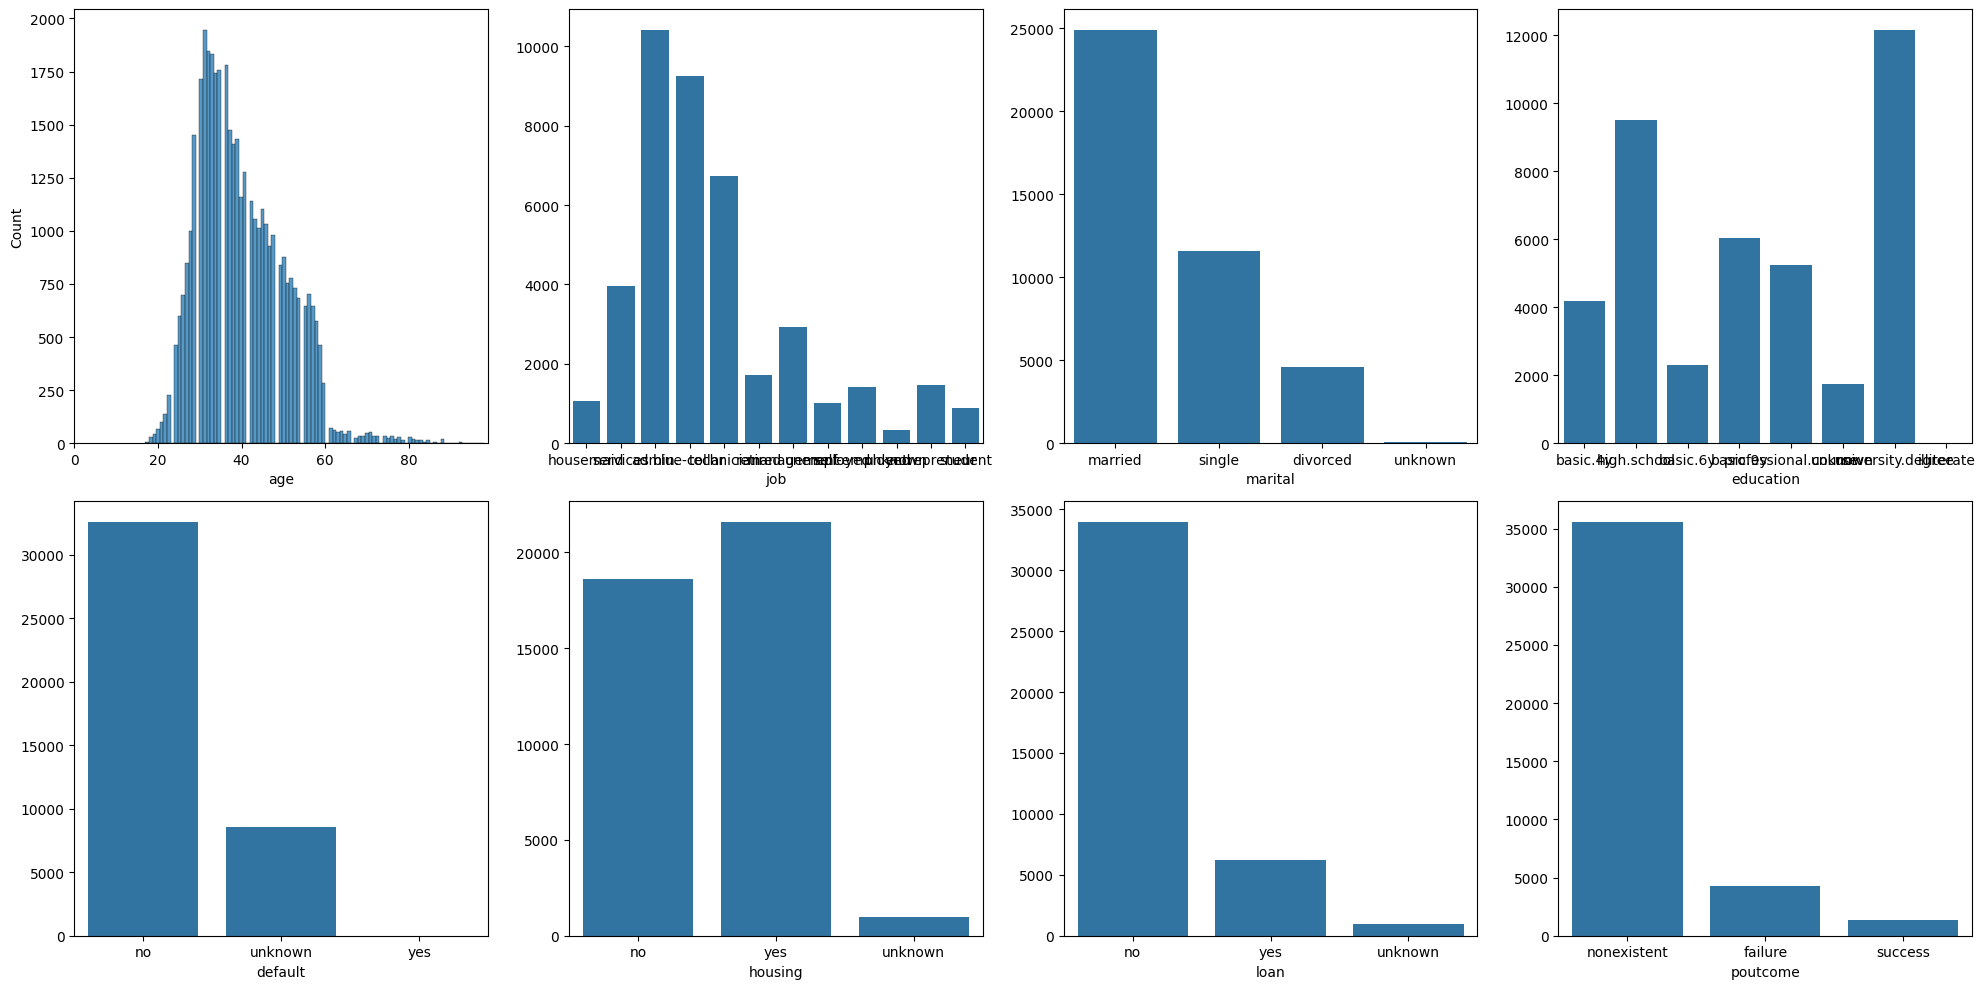

In [15]:
#Graphic visualization about categorical variables
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes object with 2x4 subgraphs
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Create histograms for each variable
sns.histplot(data=df, x="age", ax=axes[0, 0]).set_xlim(0, 99)
sns.countplot(data=df, x="job", ax=axes[0, 1]).set(ylabel=None)
sns.countplot(data=df, x="marital", ax=axes[0, 2]).set(ylabel=None)
sns.countplot(data=df, x="education", ax=axes[0, 3]).set(ylabel=None)
sns.countplot(data=df, x="default", ax=axes[1, 0]).set(ylabel=None)
sns.countplot(data=df, x="housing", ax=axes[1, 1]).set(ylabel=None)

# Add variables 'loan' y 'poutcome'
sns.countplot(data=df, x="loan", ax=axes[1, 2]).set(ylabel=None)
sns.countplot(data=df, x="poutcome", ax=axes[1, 3]).set(ylabel=None)

# Ajust the layout of the figure
plt.tight_layout()

# Show the graph
plt.show()

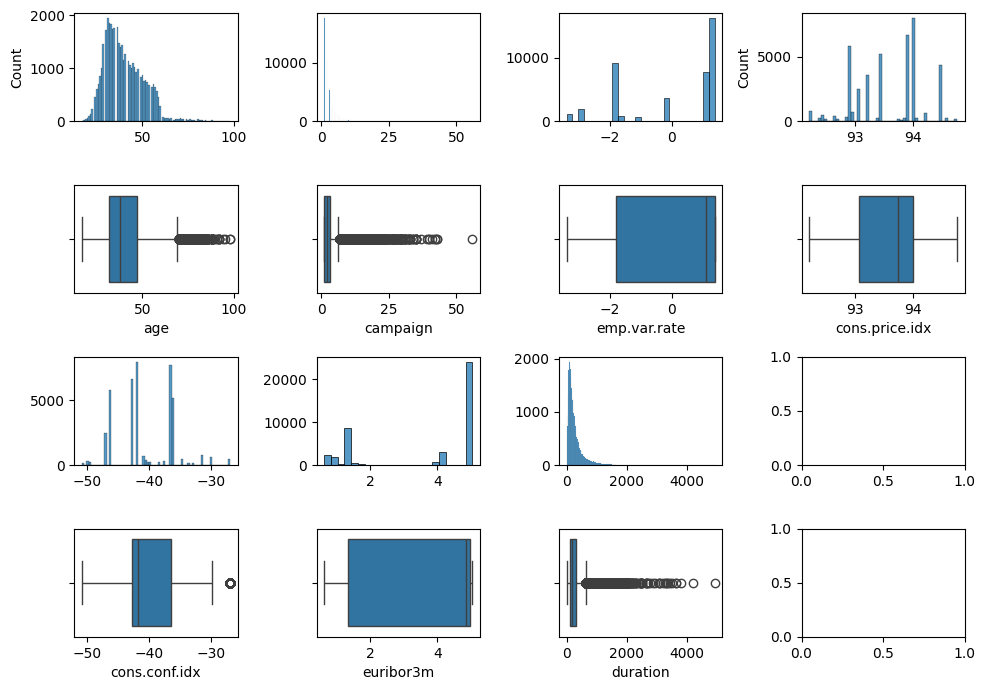

In [16]:
# Graphic visualization about numerical variables
# Create a figure and axes object with 4x4 subgraphs
fig, axes = plt.subplots(4, 4, figsize=(10, 7))

# Create histograms and boxplots for numerical variables
sns.histplot(ax=axes[0, 0], data=df, x="age").set(xlabel=None)
sns.boxplot(ax=axes[1, 0], data=df, x="age")
sns.histplot(ax=axes[0, 1], data=df, x="campaign").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[1, 1], data=df, x="campaign")
sns.histplot(ax=axes[0, 2], data=df, x="emp.var.rate").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[1, 2], data=df, x="emp.var.rate")
sns.histplot(ax=axes[0, 3], data=df, x="cons.price.idx").set(xlabel=None)
sns.boxplot(ax=axes[1, 3], data=df, x="cons.price.idx")

sns.histplot(ax=axes[2, 0], data=df, x="cons.conf.idx").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[3, 0], data=df, x="cons.conf.idx")
sns.histplot(ax=axes[2, 1], data=df, x="euribor3m").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[3, 1], data=df, x="euribor3m")
sns.histplot(ax=axes[2, 2], data=df, x="duration").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[3, 2], data=df, x="duration")

# Ajust layout
plt.tight_layout()

# Show the graph
plt.show()


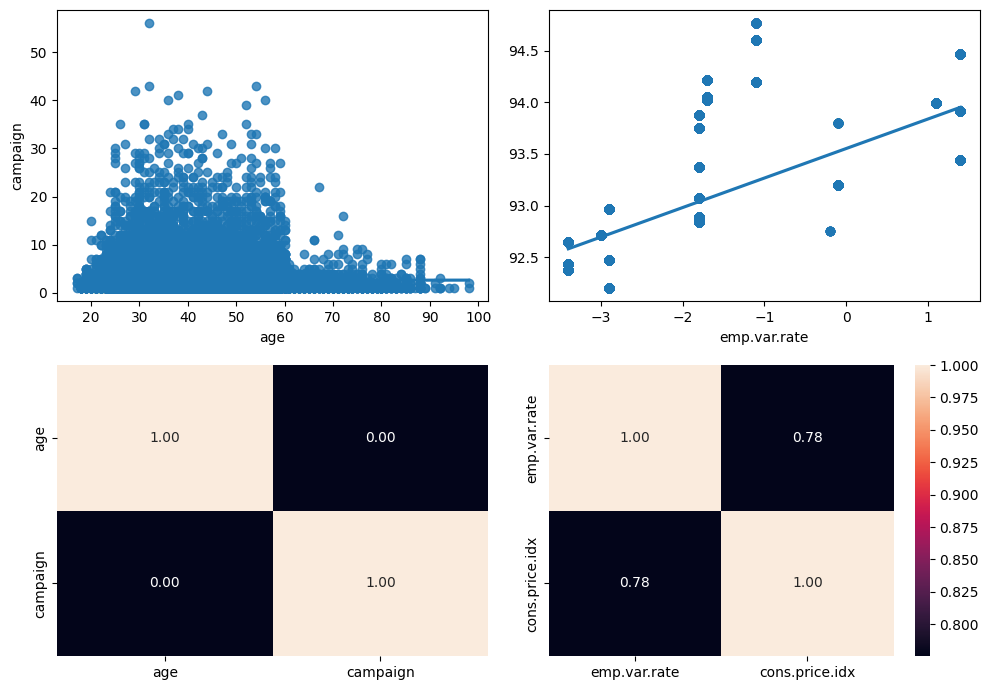

In [17]:
#MultiVariables Graphic visualization
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Create a regular plot
sns.regplot(ax=axis[0, 0], data=df, x="age", y="campaign")
sns.heatmap(df[["age", "campaign"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

# We calculate "emp.var.rate" and "cons.price.idx" as variables of interest
sns.regplot(ax=axis[0, 1], data=df, x="emp.var.rate", y="cons.price.idx").set(ylabel=None)
sns.heatmap(df[["emp.var.rate", "cons.price.idx"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Ajust layout
plt.tight_layout()

# Show plot
plt.show()


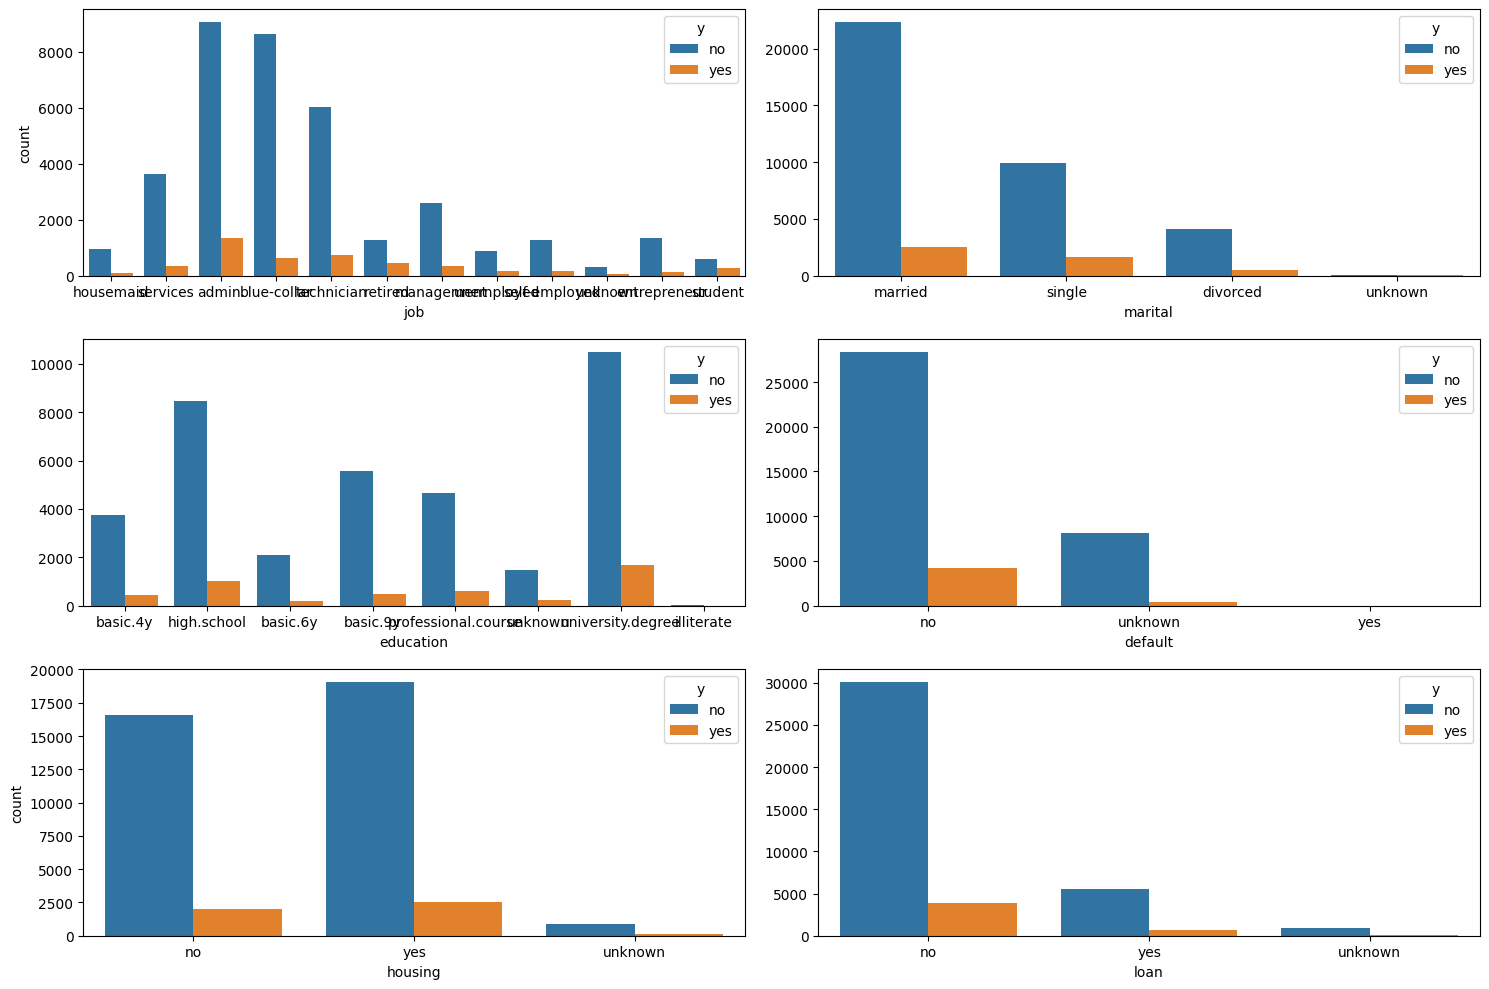

In [18]:
# Analysis of the master class ("y") versus categorical characteristics
fig, axis = plt.subplots(3, 2, figsize=(15, 10))

sns.countplot(ax=axis[0, 0], data=df, x="job", hue="y")
sns.countplot(ax=axis[0, 1], data=df, x="marital", hue="y").set(ylabel=None)
sns.countplot(ax=axis[1, 0], data=df, x="education", hue="y").set(ylabel=None)
sns.countplot(ax=axis[1, 1], data=df, x="default", hue="y").set(ylabel=None)
sns.countplot(ax=axis[2, 0], data=df, x="housing", hue="y")
sns.countplot(ax=axis[2, 1], data=df, x="loan", hue="y").set(ylabel=None)
#missingpoutcome

plt.tight_layout()

plt.show()

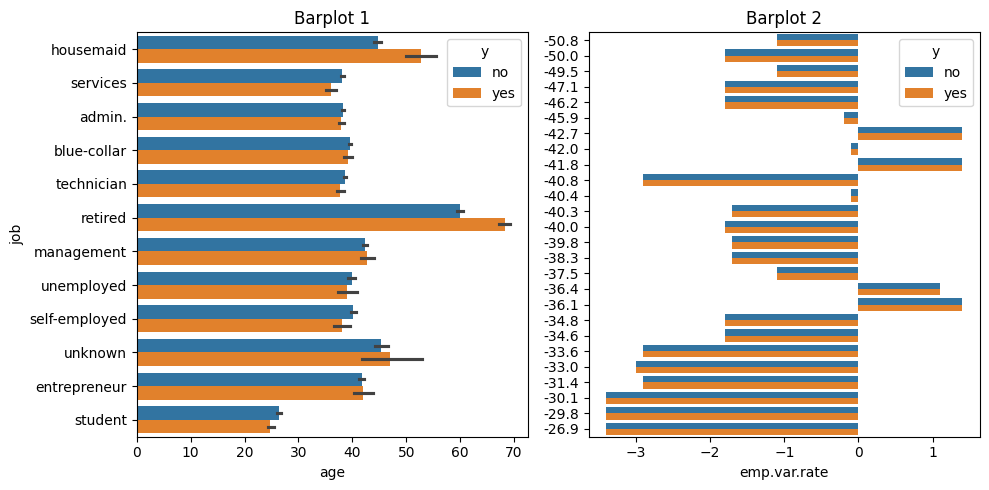

In [19]:
fig, axis = plt.subplots(figsize=(10, 5), ncols=2)

# First plot
sns.barplot(ax=axis[0], data=df, x="age", y="job", hue="y", orient="h")
axis[0].set(title="Barplot 1")

# Second plot
sns.barplot(ax=axis[1], data=df, x="emp.var.rate", y="cons.conf.idx", hue="y", orient="h")
axis[1].set(title="Barplot 2", ylabel=None)

plt.tight_layout()
plt.show()


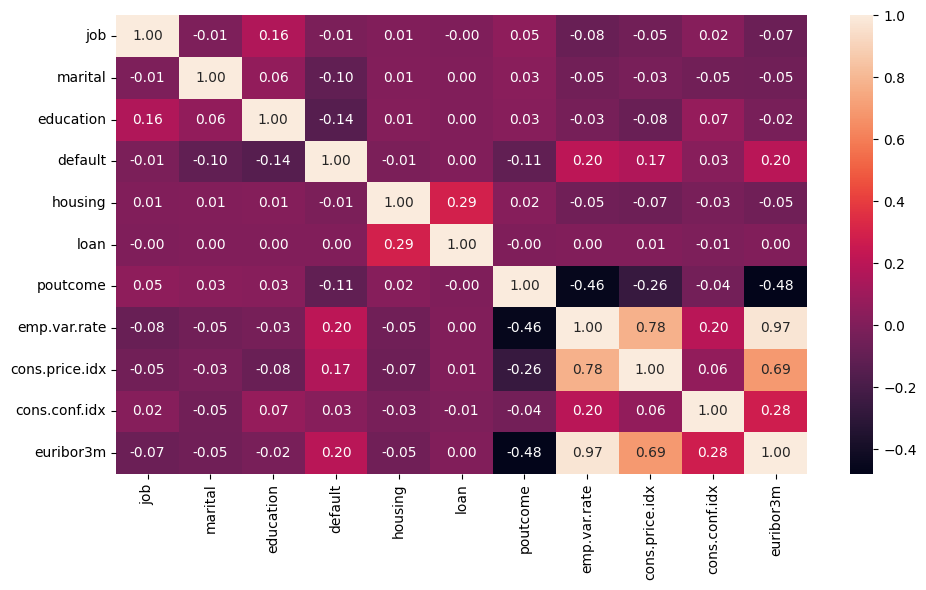

In [20]:
#CorrelationAnalysis
#Apply Label Encoding to categorical variables to convert Strings to floats directly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy original dataframe
df_encoded = df.copy()

# Encode categorical variables using Label Encoding
for col in ["job", "marital", "education", "default", "housing", "loan", "poutcome"]:
    df_encoded[col] = pd.factorize(df[col])[0]

# Convert "y" to numeric values ​​(although it already appears to be binarized)
df_encoded["y"] = pd.factorize(df["y"])[0]

# Crreate correlation matrix
fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(df_encoded[["job", "marital", "education", "default", "housing", "loan", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]].corr(), annot=True, fmt=".2f")
plt.tight_layout()
plt.show()



Interpretation of the correlation:

✅age vs. emp.var.rate: The correlation is approximately -0.15. It indicates a weak negative correlation between age and the rate of change in employment. This could suggest that younger people tend to experience greater variations in employment rates.

✅age vs. euribor3m: The correlation is approximately -0.16. Indicates a weak negative correlation between age and the 3-month Euribor rate. It may mean that younger people could...moderately negative relationship between the rate of change in employment and the target variable "y". This suggests that as the rate of change in employment decreases, the target variable "y" is more likely to be positive (indicating the making of a long-term deposit).

✅euribor3m vs. y: The correlation is approximately -0.31. Similar to the previous correlation, it suggests that as the 3-month Euribor rate decreases, the target variable "y" is more likely to be positive.

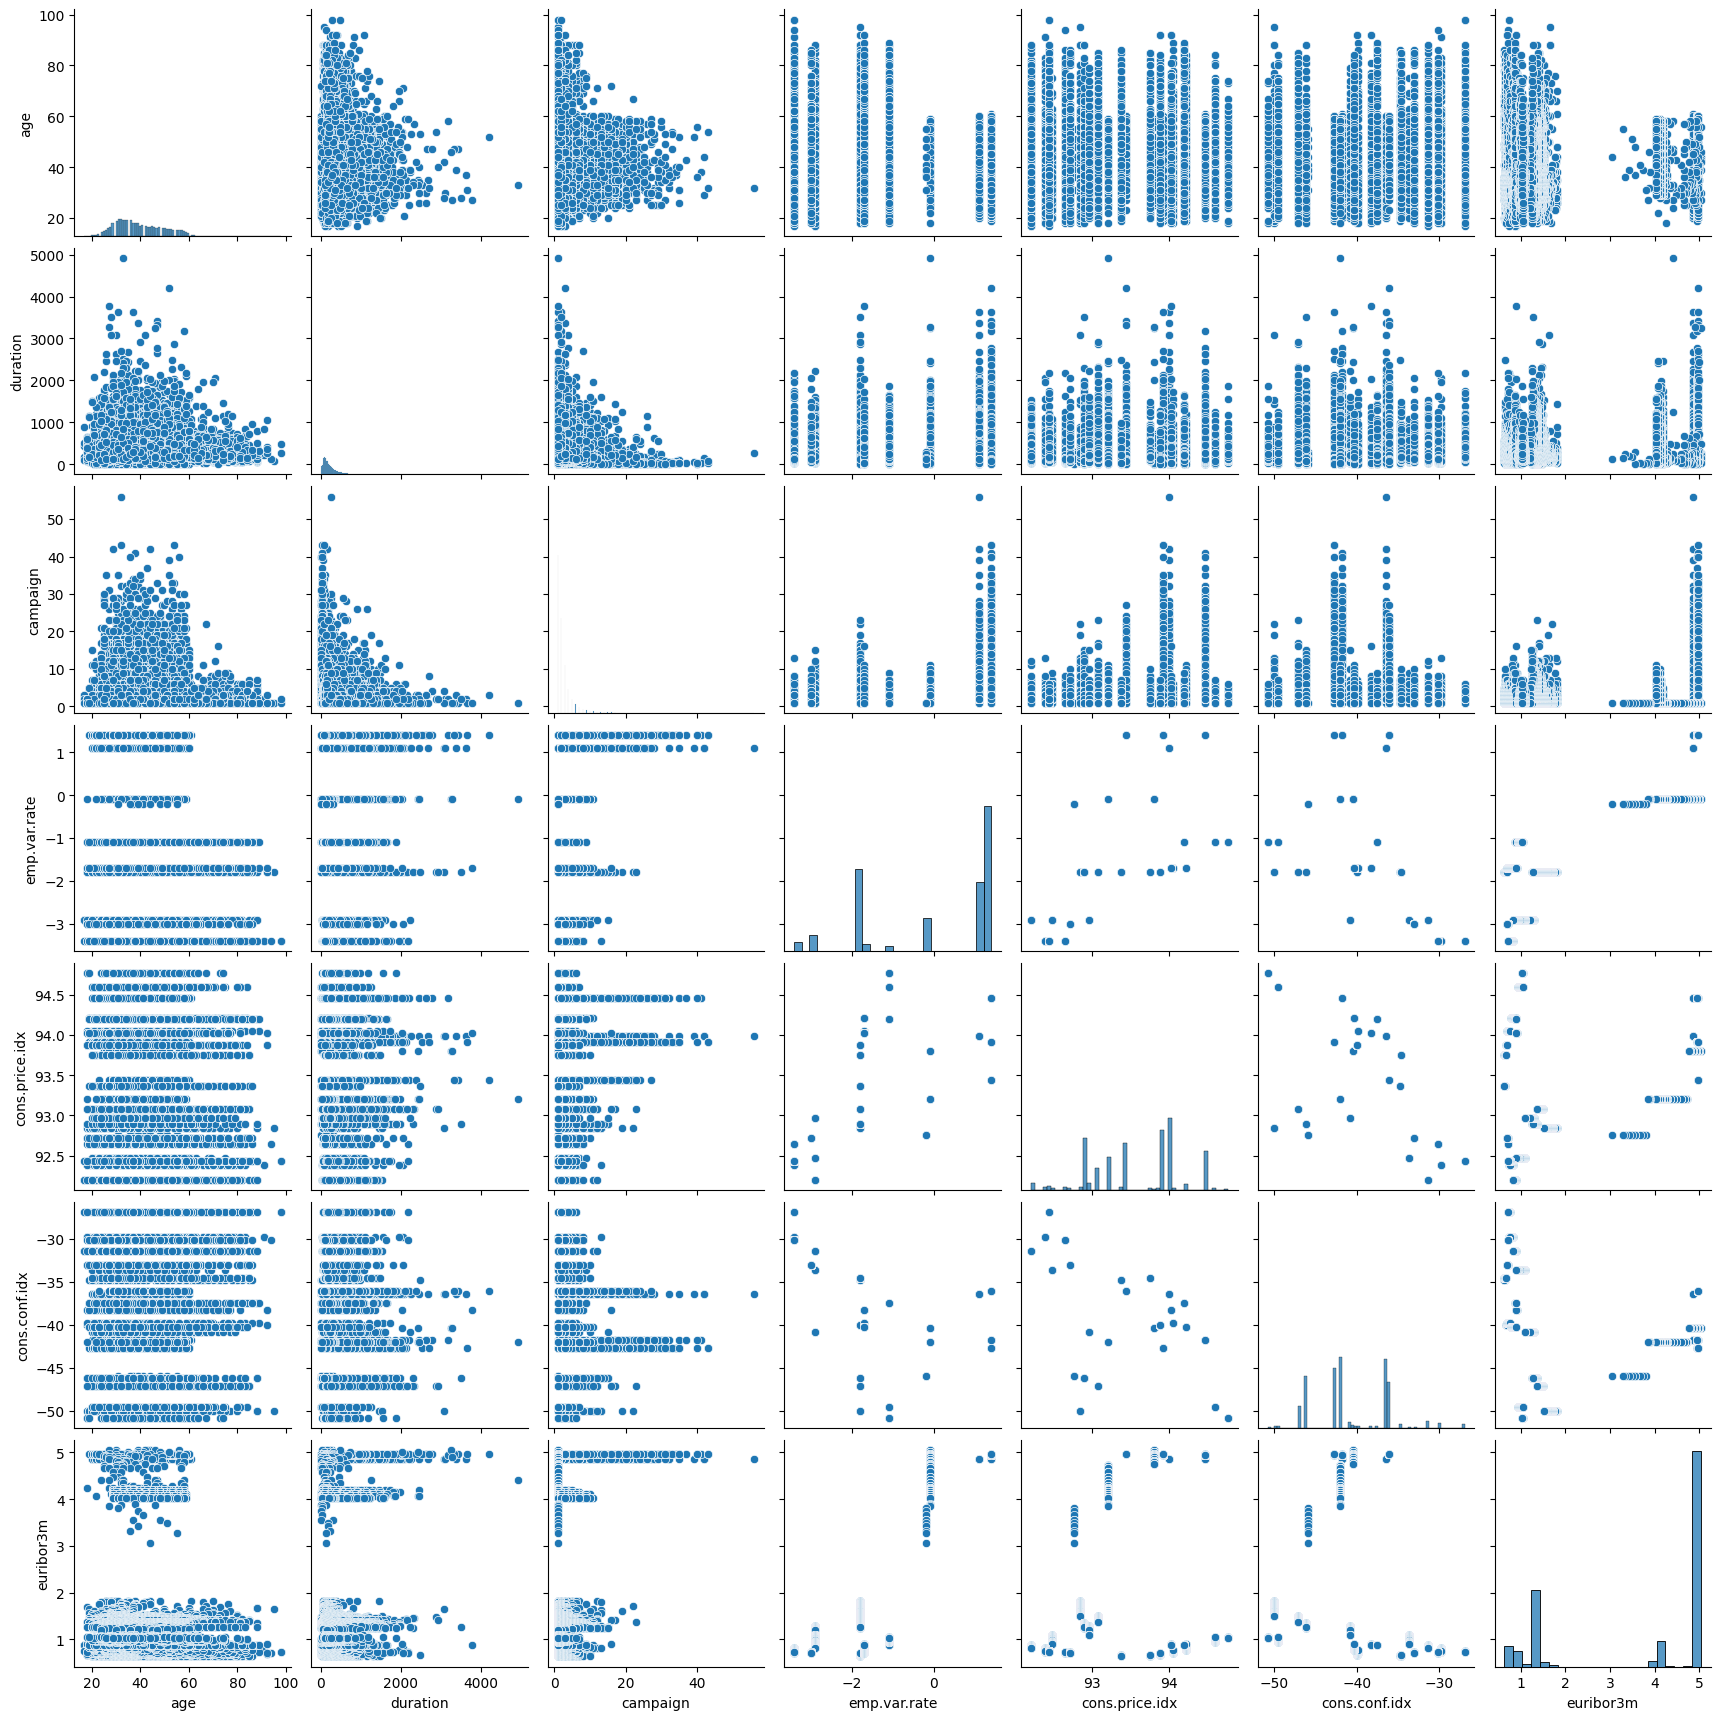

In [21]:
sns.pairplot(data = df)

Feature Engineering

Outliers Review

In [22]:
df.describe()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,0.081922,93.575720,-40.502863,3.621293
std,10.42068,259.305321,2.770318,1.570883,0.578839,4.627860,1.734437
min,17.00000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000
25%,32.00000,102.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000
50%,38.00000,180.000000,2.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.00000,319.000000,3.000000,1.400000,93.994000,-36.400000,4.961000
max,98.00000,4918.000000,56.000000,1.400000,94.767000,-26.900000,5.045000


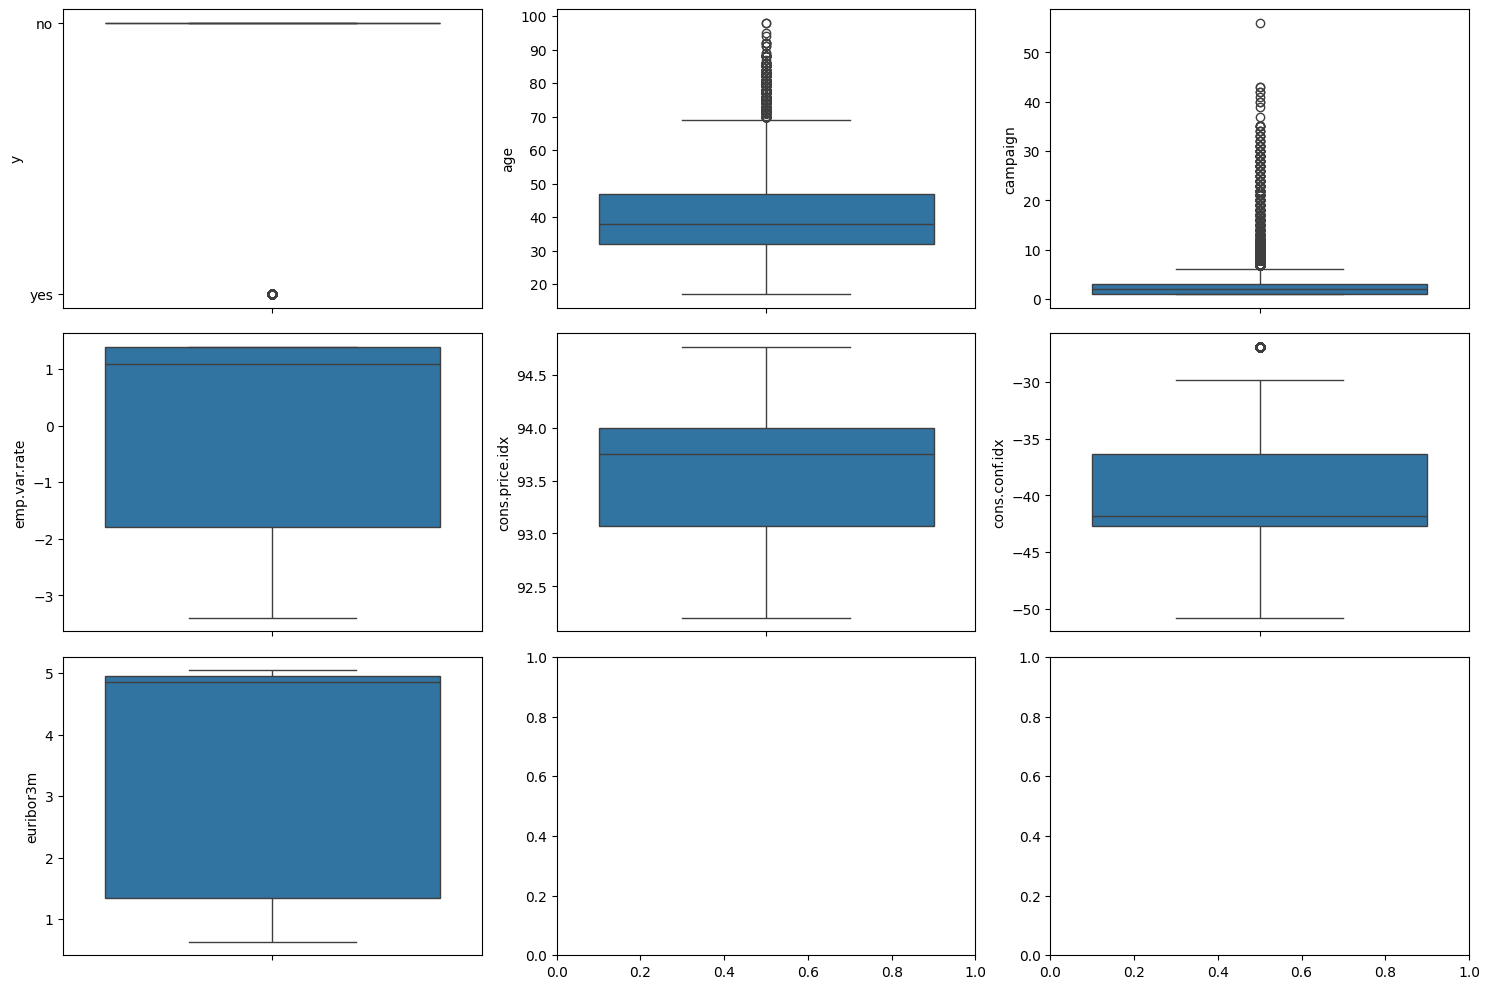

In [23]:
# Load Boxplot
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = df, y = "y")
sns.boxplot(ax = axis[0, 1], data = df, y = "age")
sns.boxplot(ax = axis[0, 2], data = df, y = "campaign")
sns.boxplot(ax = axis[1, 0], data = df, y = "emp.var.rate")
sns.boxplot(ax = axis[1, 1], data = df, y = "cons.price.idx")
sns.boxplot(ax = axis[1, 2], data = df, y = "cons.conf.idx")
sns.boxplot(ax = axis[2, 0], data = df, y = "euribor3m")

plt.tight_layout()

plt.show()

In [24]:
# Variables of interest
variables_interes = ["y", "age", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]

# Get descriptive statistics for each variable
for variable in variables_interes:
    variable_stats = df[variable].describe()
    print(f"\nEstadísticas descriptivas para {variable}:\n{variable_stats}")


Estadísticas descriptivas para y:
count     41176
unique        2
top          no
freq      36537
Name: y, dtype: object

Estadísticas descriptivas para age:
count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

Estadísticas descriptivas para campaign:
count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

Estadísticas descriptivas para emp.var.rate:
count    41176.000000
mean         0.081922
std          1.570883
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

Estadísticas descriptivas para cons.price.idx:
count    41176.000000
mean        93.575720
std          0.578839
min         92.201000
25%  

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   duration        41176 non-null  int64  
 8   campaign        41176 non-null  int64  
 9   poutcome        41176 non-null  object 
 10  emp.var.rate    41176 non-null  float64
 11  cons.price.idx  41176 non-null  float64
 12  cons.conf.idx   41176 non-null  float64
 13  euribor3m       41176 non-null  float64
 14  y               41176 non-null  object 
dtypes: float64(4), int64(3), object(8)
memory usage: 5.0+ MB


In [27]:
import pandas as pd

# Supongamos que ya tienes tu DataFrame df y has identificado las columnas numéricas
numerical_columns = ['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

# Calcular estadísticas descriptivas
stats = df.describe(percentiles=[0.25, 0.75])

# Iterar sobre las columnas numéricas
for column in numerical_columns:
    # Calcular IQR, límites superior e inferior
    iqr = stats.loc['75%', column] - stats.loc['25%', column]
    upper_limit = stats.loc['75%', column] + 1.5 * iqr
    lower_limit = stats.loc['25%', column] - 1.5 * iqr

    # Calcular e imprimir el IQR
    print(f"IQR for {column}: {iqr}")

    # Imprimir límites
    print(f"Upper limit for {column}: {upper_limit}")
    print(f"Lower limit for {column}: {lower_limit}")

    # Filtrar valores atípicos más allá de los límites
    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]

    # Imprimir o manejar los valores atípicos según sea necesario
    print(f"Outliers for {column}:\n{outliers}\n")







IQR for age: 15.0
Upper limit for age: 69.5
Lower limit for age: 9.5
Outliers for age:
       age      job   marital            education  default housing loan  \
27713   70  retired  divorced             basic.4y       no     yes   no   
27757   76  retired   married    university.degree       no      no  yes   
27780   73  retired   married    university.degree       no     yes   no   
27800   88  retired  divorced             basic.4y       no     yes   no   
27802   88  retired  divorced             basic.4y       no      no   no   
...    ...      ...       ...                  ...      ...     ...  ...   
40986   84  retired  divorced             basic.4y  unknown     yes  yes   
40996   81  retired   married             basic.4y       no     yes   no   
41004   80  retired   married  professional.course       no     yes   no   
41183   73  retired   married  professional.course       no     yes   no   
41187   74  retired   married  professional.course       no     yes   no   



✨Conclusions

✅Age (age):

IQR: 15.0
Upper limit: 69.5
Lower limit: 9.5
No outliers are identified for the 'age' variable since the limits are beyond the minimum and maximum values of the variable.

The distribution of ages appears to be within reasonable limits (no outliers). Verify that there are no incorrect or unexpected entries in this column.

✅Duration (duration):

IQR: 217.0
Upper limit: 644.5
Lower limit: -223.5
Values above the upper limit of 644.5 or below the lower limit of -223.5 would be identified as outliers.

There are potential outliers in the duration of interactions. They may be legitimate, but they could also result from input errors. Consider examining those cases more closely.

✅Campaign (campaign):

IQR: 2.0
Upper limit: 6.0
Lower limit: -2.0
Values above the upper limit of 6.0 or below the lower limit of -2.0 would be identified as outliers.

The number of contacts during the campaign also has potential outliers. Evaluate whether these values are consistent with the nature of your data or if they could be errors.

✅Employment Variation Rate (emp.var.rate):

IQR: 3.2
Upper limit: 6.2
Lower limit: -6.6
Values above the upper limit of 6.2 or below the lower limit of -6.6 would be identified as outliers.

The employment variation rate seems to vary significantly. Outliers might be expected in this case and could represent exceptional moments in the job market.

✅Consumer Price Index (cons.price.idx):

IQR: 0.919
Upper limit: 95.3725
Lower limit: 91.6965
Values above the upper limit of 95.3725 or below the lower limit of 91.6965 would be identified as outliers.

The upper and lower limits for the consumer price index indicate potential outliers. Verify if these values make sense in the context of your data.

✅Consumer Confidence Index (cons.conf.idx):

IQR: 6.3
Upper limit: -26.95
Lower limit: -52.15
Values above the upper limit of -26.95 or below the lower limit of -52.15 would be identified as outliers.

There are potential outliers in the consumer confidence index. Examine whether these values are consistent with the expected variability in consumer confidence.


✅Euribor 3 Months (euribor3m):

IQR: 3.617
Upper limit: 10.3865
Lower limit: -4.0815
Values above the upper limit of 10.3865 or below the lower limit of -4.0815 would be identified as outliers.

Similar to the employment variation rate, outliers in euribor3m can be expected and might represent exceptional moments in financial markets.

In [28]:
#Eliminate outliers

In [29]:
df.shape

(41176, 15)

Calculate IQR and limits

In [38]:
import pandas as pd

# Create a backup copy of the original DataFrame
df_backup = df.copy()

# Variables of interest
variables_interes = ["y", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]

# Calculate upper and lower limits for the search for outliers for each variable
for variable in variables_interes:
    variable_stats = df[variable].describe()

    # Check if '75%' and '25%' exist in the statistics
    if '75%' in variable_stats.index and '25%' in variable_stats.index:
        iqr = variable_stats["75%"] - variable_stats["25%"]
        upper_limit = variable_stats["75%"] + 1.5 * iqr
        lower_limit = variable_stats["25%"] - 1.5 * iqr

        # Print lower limit, upper limit, and IQR for the current variable
        print(f"--- Limits and IQR for {variable} ---")
        print(f"Lower Limit: {lower_limit}")
        print(f"Upper Limit: {upper_limit}")
        print(f"IQR: {iqr}")

        # Count values above and below the limits
        above_upper_limit = (df[variable] > upper_limit).sum()
        below_lower_limit = (df[variable] < lower_limit).sum()

        print(f"Above Upper Limit Count: {above_upper_limit}")
        print(f"Below Lower Limit Count: {below_lower_limit}")
        print("\n")
    else:
        print(f"--- Not enough data for {variable} to calculate IQR ---\n")



--- Not enough data for y to calculate IQR ---

--- Limits and IQR for campaign ---
Lower Limit: -2.0
Upper Limit: 6.0
IQR: 2.0
Above Upper Limit Count: 2406
Below Lower Limit Count: 0


--- Limits and IQR for emp.var.rate ---
Lower Limit: -6.6000000000000005
Upper Limit: 6.200000000000001
IQR: 3.2
Above Upper Limit Count: 0
Below Lower Limit Count: 0


--- Limits and IQR for cons.price.idx ---
Lower Limit: 91.69650000000001
Upper Limit: 95.3725
IQR: 0.9189999999999969
Above Upper Limit Count: 0
Below Lower Limit Count: 0


--- Limits and IQR for cons.conf.idx ---
Lower Limit: -52.150000000000006
Upper Limit: -26.949999999999992
IQR: 6.300000000000004
Above Upper Limit Count: 446
Below Lower Limit Count: 0


--- Limits and IQR for euribor3m ---
Lower Limit: -4.081499999999999
Upper Limit: 10.3865
IQR: 3.617
Above Upper Limit Count: 0
Below Lower Limit Count: 0




Let's interpret these results for each variable:

✅Campaign:

Lower Limit: -2.0
Upper Limit: 6.0
IQR: 2.0
Interpretation: For the 'campaign' variable, values below -2.0 and above 6.0 are considered potential outliers. The IQR, which represents the spread of the middle 50% of the data, is 2.0.

✅Emp.var.rate:

Lower Limit: -6.6
Upper Limit: 6.2
IQR: 3.2
Interpretation: 'emp.var.rate' values below -6.6 and above 6.2 are potential outliers. The IQR is 3.2, indicating the spread of the central 50% of the data.

✅Cons.price.idx:

Lower Limit: 91.6965
Upper Limit: 95.3725
IQR: 0.919
Interpretation: Values for 'cons.price.idx' below 91.6965 and above 95.3725 are considered potential outliers. The IQR is 0.919, reflecting the spread of the middle 50% of the data.

✅Cons.conf.idx:

Lower Limit: -52.15
Upper Limit: -26.95
IQR: 6.3
Interpretation: 'cons.conf.idx' values below -52.15 and above -26.95 are potential outliers. The IQR is 6.3, indicating the spread of the central 50% of the data.

✅Euribor3m:

Lower Limit: -4.0815
Upper Limit: 10.3865
IQR: 3.617
Interpretation: Values for 'euribor3m' below -4.0815 and above 10.3865 are considered potential outliers. The IQR is 3.617, representing the spread of the middle 50% of the data.

We are in campaign, since 2406 values ​​are above the limit and therefore are considered outliers


In [43]:
import pandas as pd

# Create a backup copy of the original DataFrame
df_backup = df.copy()

# Variable of interest
variable = "campaign"

# Calculate upper and lower limits for the search for outliers for the variable
variable_stats = df[variable].describe()

# Check if '75%' and '25%' exist in the statistics
if '75%' in variable_stats.index and '25%' in variable_stats.index:
    iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * iqr
    lower_limit = variable_stats["25%"] - 1.5 * iqr

    # Print lower limit, upper limit, and IQR for the variable
    print(f"--- Limits and IQR for {variable} ---")
    print(f"Lower Limit: {lower_limit}")
    print(f"Upper Limit: {upper_limit}")
    print(f"IQR: {iqr}")

    # Count values above and below the limits
    above_upper_limit = (df[variable] > upper_limit).sum()
    below_lower_limit = (df[variable] < lower_limit).sum()

    print(f"Above Upper Limit Count: {above_upper_limit}")
    print(f"Below Lower Limit Count: {below_lower_limit}")

    # Store outlier details in the dictionary
    outliers = df[(df[variable] > upper_limit) | (df[variable] < lower_limit)]

    print("\nOutlier Details:")
    print(outliers)
else:
    print(f"--- Not enough data for {variable} to calculate IQR ---\n")


--- Limits and IQR for campaign ---
Lower Limit: -2.0
Upper Limit: 6.0
IQR: 2.0
Above Upper Limit Count: 2406
Below Lower Limit Count: 0

Outlier Details:
       age           job   marital            education  default housing loan  \
887     54        admin.   married    university.degree       no      no   no   
1043    41    technician    single    university.degree  unknown      no   no   
1094    40    technician   married  professional.course       no     yes   no   
1097    51   blue-collar   married             basic.4y  unknown     yes   no   
1230    48   blue-collar  divorced             basic.4y       no      no   no   
...    ...           ...       ...                  ...      ...     ...  ...   
40611   75       retired   married             basic.9y       no      no   no   
40631   88       retired   married             basic.4y       no     yes   no   
40698   29    technician    single  professional.course       no     yes   no   
40821   33    technician    single 

In [41]:
print(outliers_campaign['campaign'])

887      7
1043     8
1094     8
1097     7
1230     7
        ..
40611    9
40631    7
40698    7
40821    9
40993    7
Name: campaign, Length: 2406, dtype: int64


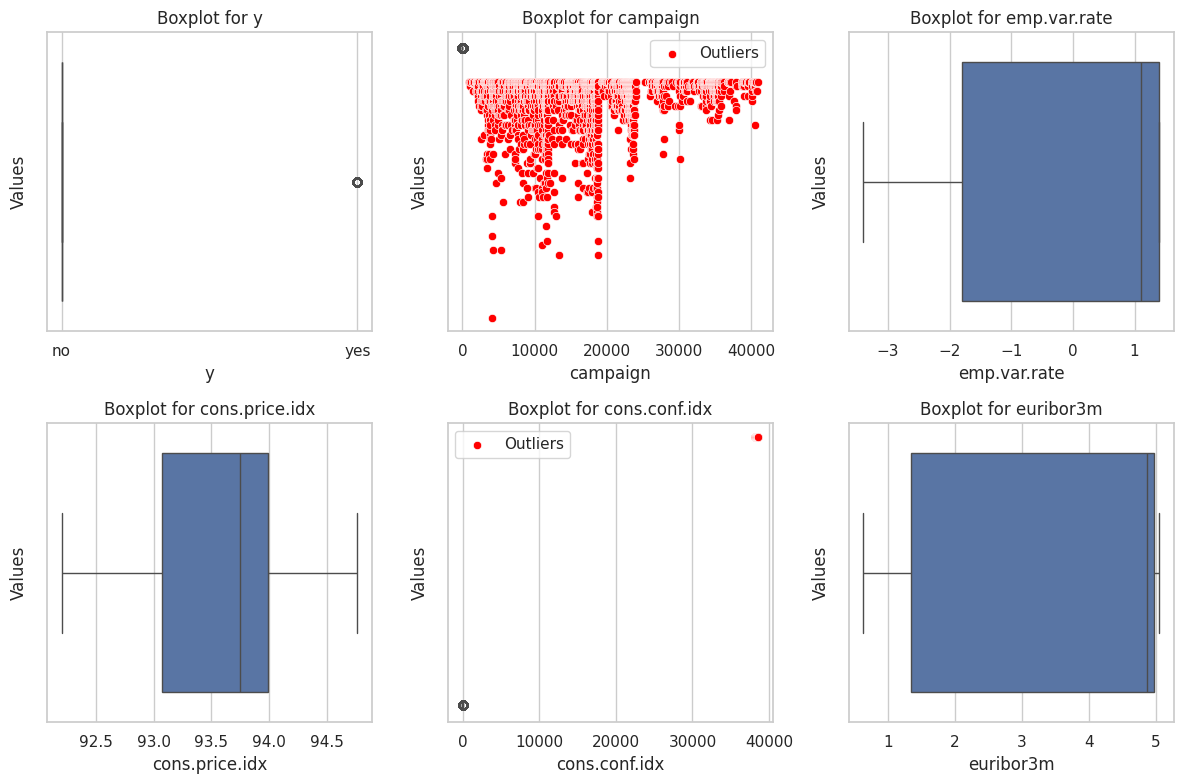

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a backup copy of the original DataFrame
df_backup = df.copy()

# Variables of interest
variables_interes = ["y", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Loop through each variable and create a boxplot
for i, variable in enumerate(variables_interes, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[variable])

    # Highlight outliers
    numeric_data = pd.to_numeric(df[variable], errors='coerce')  # Convert to numeric, coerce errors to NaN
    numeric_data = numeric_data.dropna()  # Drop NaN values

    # Check if there are enough data points to calculate quartiles
    if len(numeric_data) >= 4:
        q25, q75 = np.percentile(numeric_data, [25, 75])
        iqr = q75 - q25
        upper_limit = q75 + 1.5 * iqr
        lower_limit = q25 - 1.5 * iqr

        outliers = df[(pd.to_numeric(df[variable], errors='coerce') < lower_limit) | (pd.to_numeric(df[variable], errors='coerce') > upper_limit)]
        sns.scatterplot(x=outliers.index, y=outliers[variable], color='red', label='Outliers')

    plt.title(f'Boxplot for {variable}')
    plt.xlabel(variable)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()


We maintain campaign outliers, the upper limit is 6 and it may be that there are clients who have been the subject of 9 campaigns, which is the maximum that is observed. Therefore we preserve the outliers.

Eliminación de outliers: En este caso no aplica.

In [ ]:
 ''' # Remove outliers and update the original DataFrame
    df = df[(df[variable] >= lower_limit) & (df[variable] <= upper_limit)]

    print(f"\nLímites superior e inferior para la búsqueda de outliers de {variable}:")
    print(f"Superior: {round(upper_limit, 2)}, Inferior: {round(lower_limit, 2)}, Rango intercuartílico: {round(iqr, 2)}")

# Show information about removing outliers
print("\nNúmero de filas antes de eliminar outliers:", len(df_backup))
print("Número de filas después de eliminar outliers:", len(df))'''

In [45]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   duration        41176 non-null  int64  
 8   campaign        41176 non-null  int64  
 9   poutcome        41176 non-null  object 
 10  emp.var.rate    41176 non-null  float64
 11  cons.price.idx  41176 non-null  float64
 12  cons.conf.idx   41176 non-null  float64
 13  euribor3m       41176 non-null  float64
 14  y               41176 non-null  object 
dtypes: float64(4), int64(3), object(8)
memory usage: 5.0+ MB


In [ ]:
#Normalización 👉 La normalización se refiere a cambiar la escala de los atributos numéricos de valor real a un rango de 0 a 1. La normalización de datos se usa en el aprendizaje automático para hacer que el entrenamiento de modelos sea menos sensible a la escala de características. Esto permite que nuestro modelo converja a mejores pesos y, a su vez, conduce a un modelo más preciso.
#Si tras la normalización obtenemos valores negativos debemos usar Escalado Mínimo-Máximo
'''from sklearn.preprocessing import StandardScaler
import pandas as pd

num_variables = ["age", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(df[num_variables])
df_norm = pd.DataFrame(norm_features, index=df.index, columns=num_variables)
df_norm["y"] = df["y"]  # Variable objetivo
df_norm.head()'''

In [ ]:
#Escalado Minimo-Máximo 👉 El escalado mínimo funciona restando el valor mínimo de cada punto de datos y dividiéndolo por el rango de valores. Esto garantiza que el valor mínimo se transforme en 0 y el valor máximo se transforme en 1, con todos los demás valores escalados proporcionalmente en el medio.

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Variables numéricas de interés
num_variables = ["age", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]

# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Escalar las variables numéricas y crear un nuevo DataFrame
scaled_features = scaler.fit_transform(df[num_variables])
df_scaled = pd.DataFrame(scaled_features, index=df.index, columns=num_variables)

# Agregar la variable objetivo al DataFrame escalado
df_scaled["y"] = df["y"]

# Mostrar las primeras filas del DataFrame escalado
print(df_scaled.head())


In [47]:
#Feature Selection
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


# Encode categorical variables
le = LabelEncoder()
df_encoded = df.apply(lambda x: le.fit_transform(x) if x.dtype == 'O' else x)

# Divide the dataset into training and test samples.
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]

# Scale the features to [0, 1] range
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Use random_state to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# With a value of k = 5, we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(chi2, k=5)
selection_model.fit(X_train, y_train)

# Get the indices of the selected features
ix = selection_model.get_support()

# Extract the selected features for both training and test sets
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X.columns.values[ix])

# Display the selected features
print(X_train_sel.head())

   default  duration  emp.var.rate  cons.price.idx  euribor3m
0      0.0  0.058154      1.000000        0.669135   0.980503
1      0.0  0.036194      1.000000        0.882307   0.958966
2      0.0  0.020943      1.000000        0.484412   0.981410
3      0.0  0.027450      0.937500        0.698753   0.958059
4      0.5  0.084994      0.333333        0.269680   0.148946


In [ ]:
#heads 
X_test_sel.head()

In [ ]:
#splitting
X_train_sel["y"] = list(y_train)
X_test_sel["y"] = list(y_test)

In [ ]:
X_train_sel.to_csv("clean-bank-marketing-campaign-data.train.csv", index=False)
X_test_sel.to_csv("clean-bank-marketing-campaign-data.test.csv", index=False)

In [ ]:
# Guardar los DataFrames en archivos CSV
X_train_sel.to_csv("clean-bank-marketing-campaign-data.train.csv", index=False)
X_test_sel.to_csv("clean-bank-marketing-campaign-data.test.csv", index=False)

In [ ]:
#Regression Logistic Model Building
#Import data
import pandas as pd
train_data = pd.read_csv("clean-bank-marketing-campaign-data.train.csv")
test_data = pd.read_csv("clean-bank-marketing-campaign-data.test.csv")
train_data.head()

In [ ]:
#Optimización del modelo


In [ ]:
#Paso 1 división de variables predictoras según modelos de testeo y modelo de entrenamiento (Hecho arriba)
'''X_train = train_data.drop(["y"], axis = 1)
y_train = train_data["y"]
X_test = test_data.drop(["y"], axis = 1)
y_test = test_data["y"]'''

In [48]:
#Paso 2: Inicialización y entrenamiento del modelo
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Inicializar el modelo de regresión logística
model = LogisticRegression(random_state=42)

# Entrenar el modelo con las características seleccionadas
model.fit(X_train_sel, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_sel)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy del modelo en el conjunto de prueba: {accuracy:.2f}")

# Mostrar el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))




Accuracy del modelo en el conjunto de prueba: 0.90

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7265
           1       0.64      0.26      0.37       971

    accuracy                           0.90      8236
   macro avg       0.77      0.62      0.66      8236
weighted avg       0.88      0.90      0.88      8236



In [51]:
# Hacer predicciones en el conjunto de prueba original (sin selección de características)
# Aplicar la misma selección de características al conjunto de prueba original
X_test_sel_original = pd.DataFrame(selection_model.transform(X_test), columns=X.columns.values[ix])

# Hacer predicciones en el conjunto de prueba original (con selección de características)
y_pred_original = model.predict(X_test_sel_original)

# Mostrar las predicciones
print("\nPredicciones en el conjunto de prueba original:")
print(y_pred_original)




Predicciones en el conjunto de prueba original:
[1 0 0 ... 0 0 0]


In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8954589606605148

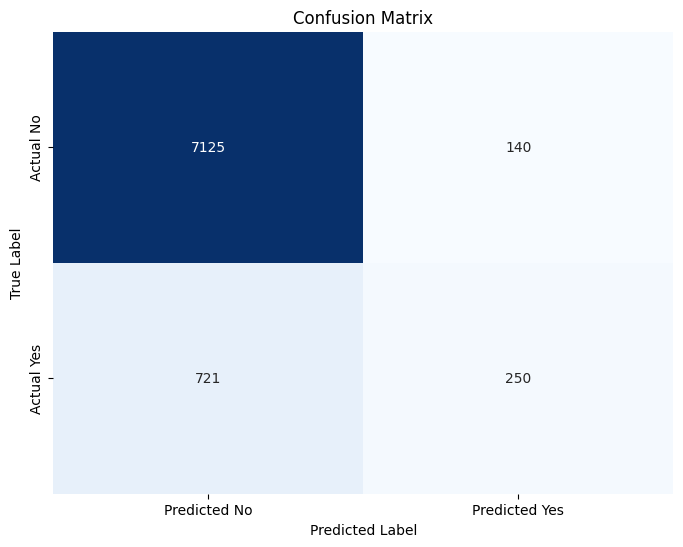

In [53]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_original)

# Crear un DataFrame de la matriz de confusión para su visualización
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Interpretación de la matriz de confusion
#✅Verdaderos positivos (TP, True positive): Se corresponde con el número 7125 y son los casos en los que el modelo predijo positivo (no supervivencia) y la clase real también es positiva
#✅Verdaderos negativos (TN, False negative): Se corresponde con el número 250 y son los casos en los que el modelo predijo negativo (supervivencia) y la clase real también es negativa
#⛔Falsos positivos (FP, False positive): Se corresponde con el número 721 y son los casos en los que el modelo predijo positivo y la clase real es negativa.
#⛔Falsos negativos (FN, False negative): Se corresponde con el número 140 y son los casos en los que el modelo predijo negativo y la clase real es positiva. Estas cuatro medidas se utilizan a menudo para calcular métricas más complejas


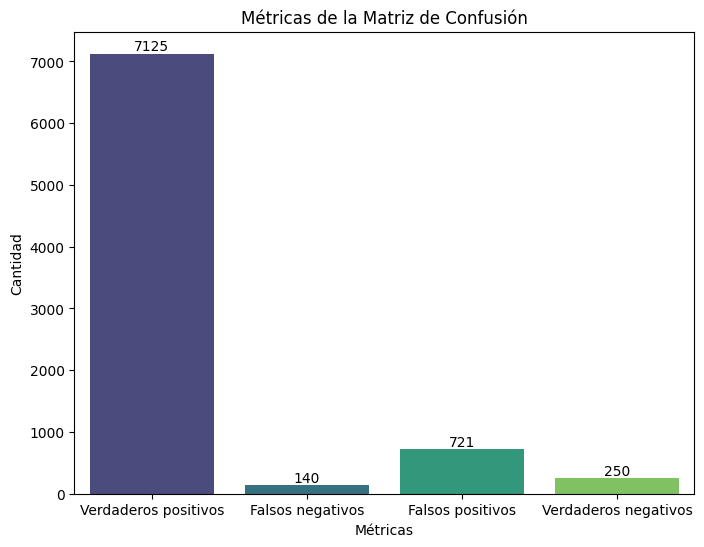

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Descomponer la matriz de confusión en variables
tp, fn, fp, tn = cm.ravel()

# Etiquetas y valores para el gráfico
labels = ['Verdaderos positivos', 'Falsos negativos', 'Falsos positivos', 'Verdaderos negativos']
values = [tp, fn, fp, tn]

# Crear un gráfico de barras con la paleta asignada a la variable de matiz (hue)
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=values, hue=labels, palette='viridis', legend=False)

# Añadir etiquetas y título
plt.title('Métricas de la Matriz de Confusión')
plt.xlabel('Métricas')
plt.ylabel('Cantidad')

# Mostrar los valores en las barras
for i, value in enumerate(values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
#Optimización de hiperparámetros de modelo
#Automático

In [57]:
from sklearn.svm import SVC  # Ejemplo con el clasificador SVM (Support Vector Machine)

# Crear una instancia del clasificador
clf = SVC()

# Obtener los hiperparámetros del clasificador
hyperparams = clf.get_params()

# Mostrar los hiperparámetros
print(hyperparams)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [60]:
#Optimizacion del modelo con GridSearch encontrando los mejores hiperparámetros
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Paso 1: Definir y crear el modelo
model = LogisticRegression()

# Paso 2: Configurar la búsqueda de cuadrícula
hyperparams = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000],
    'class_weight': [None, 'balanced'],
    'random_state': [None, 42],
}

grid = GridSearchCV(model, hyperparams, scoring="accuracy", cv=5)

# Paso 3: Ajustar la cuadrícula con tus datos de entrenamiento
grid.fit(X_train, y_train)  # Asegúrate de tener X_train e y_train definidos

# Paso 4: Acceder a los resultados
best_model = grid.best_estimator_
best_params = grid.best_params_
best_score = grid.best_score_

# Puedes imprimir o utilizar los resultados como desees
#print("Mejor modelo:", best_model)
print("Mejores hiperparámetros:", best_params)
#print("Mejor puntuación:", best_score)


C:\Users\Rubén\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Rubén\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Rubén\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Rubén\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Rubén\AppData\Local\Programs\Python\Python311\Lib\s

Mejores hiperparámetros: {'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'random_state': None, 'solver': 'saga'}


C:\Users\Rubén\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.88864602 ...        nan 0.85003036 0.84993928]
  warnings.warn(


In [62]:
#Mejora ¿Manual? -> Con los mejores hiper parametros que no devuelva el anterior codigo hacemos el ajuste manual
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Mejores hiperparámetros: {'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'random_state': None, 'solver': 'saga'}

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba con random_state
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crea y entrena el modelo con parámetros corregidos y random_state
model_manual = LogisticRegression(penalty='l1', C=1, solver='saga', random_state=None, class_weight=None, max_iter=100)  # 'None' como cadena en class_weight
model_manual.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_manual = model_manual.predict(X_test)

# Calcula la precisión
manual_accuracy = accuracy_score(y_test, y_pred_manual)
print("Precisión del modelo (ajuste manual):", manual_accuracy)



Precisión del modelo (ajuste manual): 0.9040796503156873


In [65]:
# Valores originales
original_valor = 0.8954589606605148
nuevo_valor = 0.9040796503156873

# Calcular la mejora porcentual
mejora_porcentaje = ((nuevo_valor - original_valor) / original_valor) * 100

print("Mejora porcentual:", mejora_porcentaje)

Mejora porcentual: 0.9627118644067878


In [66]:
#Guardar modelo tras ajuste manual
import pickle

# Guardar el modelo en un archivo con pickle
with open('modelo_manual.pkl', 'wb') as file:
    pickle.dump(model_manual, file)


In [ ]:
#Recuperar modelo
'''# Cargar el modelo desde el archivo con pickle
with open('modelo_manual.pkl', 'rb') as file:
    loaded_model_manual = pickle.load(file)'''


In [70]:
#Mejora Aleatoria
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression  # Debes importar el modelo específico que estás utilizando

# Supongamos que ya has definido y creado una instancia del modelo
model = LogisticRegression()

# Definimos los parámetros que queremos ajustar
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l2", "elasticnet", None],  # Excluimos 'l1' para el solver 'sag'
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}


# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter=100, scoring="accuracy", cv=5, random_state=42)

# Ajustamos el modelo utilizando la búsqueda aleatoria
random_search.fit(X_train, y_train)  # Asegúrate de tener X_train e y_train definidos

# Mostramos los resultados de la búsqueda aleatoria
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(random_search.best_score_)



C:\Users\Rubén\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Rubén\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Rubén\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Rubén\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Rubén\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_rati

Mejores hiperparámetros encontrados:
{'solver': 'newton-cg', 'penalty': 'l2', 'C': 11.288378916846883}
Mejor puntuación de validación cruzada:
0.9116575591985429


In [71]:
# Valores originales
original_valor = 0.8954589606605148
nuevo_valor = 0.9116575591985429

# Calcular la mejora porcentual
mejora_porcentaje = ((nuevo_valor - original_valor) / original_valor) * 100

print("Mejora porcentual:", mejora_porcentaje)

Mejora porcentual: 1.8089716279213457


In [72]:
#Reentrenamiento del modelo con mejora aleatoria
model_random_search = LogisticRegression(penalty = "l2", C = 11.288378916846883, solver = "newton-cg")
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.9042010684798446

In [74]:
#Guardar modelo 
import pickle

# Guardar el modelo en un archivo
with open('modelo_entrenado_mejora_aleatoria.pkl', 'wb') as file:
    pickle.dump(random_search, file)

# Puedes cambiar 'modelo_entrenado.pkl' por el nombre que desees para el archivo.


In [ ]:
#Recuperar modelo
'''import pickle

# Cargar el modelo desde el archivo
with open('modelo_entrenado_mejora_aleatoria.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Ahora 'loaded_model' contiene tu modelo cargado y puedes usarlo para hacer predicciones'''
